# Explanatory data analysis

Our goal is to ensure that our data quality is adequate for the execution of our future Machine Learning Models.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('./cleaned_data_set.csv')

In [3]:
df.info() #see data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 107 entries, age to educational level_Some-college
dtypes: bool(100), int64(7)
memory usage: 7.3 MB


In [4]:
df.isnull().sum() #no null values

age                               0
years of studying                 0
gender                            0
capital_gain                      0
capital_loss                      0
                                 ..
educational level_HS-grad         0
educational level_Masters         0
educational level_Preschool       0
educational level_Prof-school     0
educational level_Some-college    0
Length: 107, dtype: int64

In [5]:
df.head(10)

,age,years of studying,gender,capital_gain,capital_loss,working hours per week,income,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,educational level_9th,educational level_Assoc-acdm,educational level_Assoc-voc,educational level_Bachelors,educational level_Doctorate,educational level_HS-grad,educational level_Masters,educational level_Preschool,educational level_Prof-school,educational level_Some-college
0,25,7,1,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,38,9,1,0,0,50,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,28,12,1,0,0,40,1,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,44,10,1,7688,0,40,1,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,18,10,0,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,34,6,1,0,0,30,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,29,9,1,0,0,40,0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
7,63,15,1,3103,0,32,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
8,24,10,0,0,0,40,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9,55,4,1,0,0,10,0,False,False,True,...,False,False,False,False,False,False,False,False,False,False


### Ploting

Taking a look in the distribution of our features

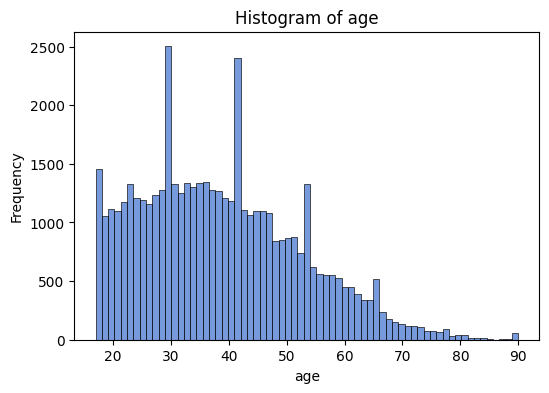

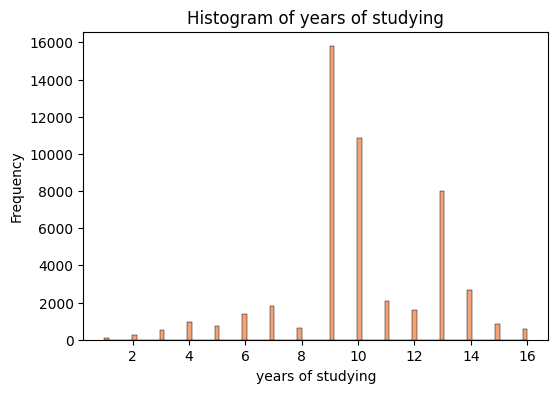

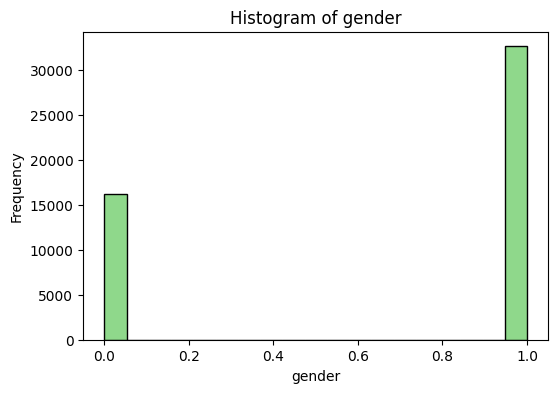

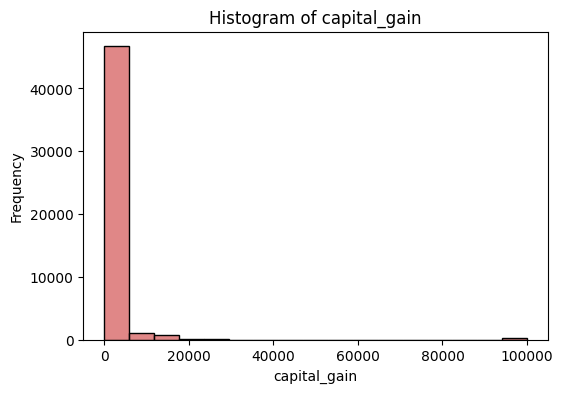

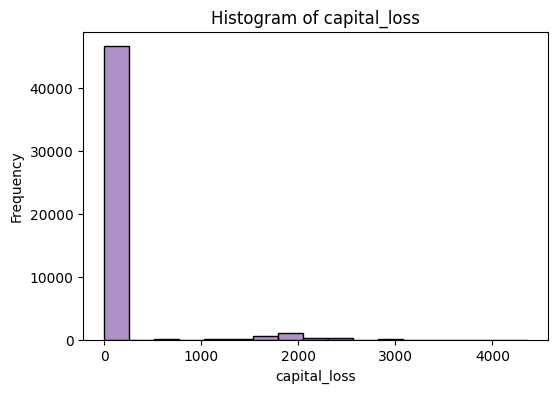

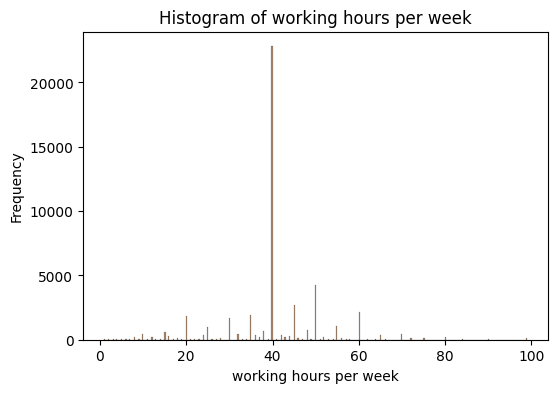

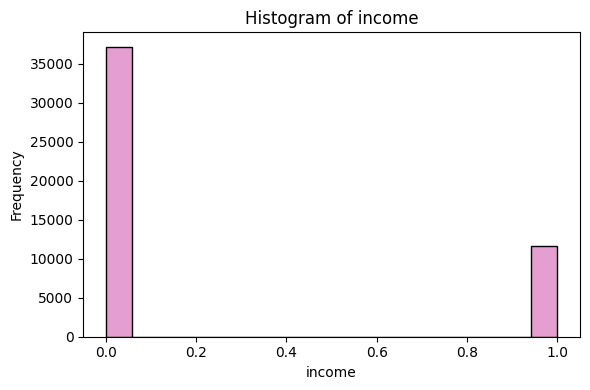

In [113]:
#Plot histograms for each numerical column to understand the distribution
num_cols = df.select_dtypes(include=np.number).columns #select numerical columns
#df[num_cols].hist(figsize=(20, 15))
#plt.show()

for i, col in enumerate(num_cols):
    plt.figure(figsize=(6, 4))  # Adjust the figure size if needed
    sns.histplot(df[col], color=sns.color_palette()[i])
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

**NOTE**: In Gender, Male=1 and Female=0

### Plot countplots for each categorical column to understand the distribution

In [67]:
drop_cols = df.select_dtypes(include=np.number).columns
drop_cols = drop_cols[drop_cols!='gender']


Index(['age', 'years of studying', 'capital_gain', 'capital_loss',
       'working hours per week', 'income'],
      dtype='object')

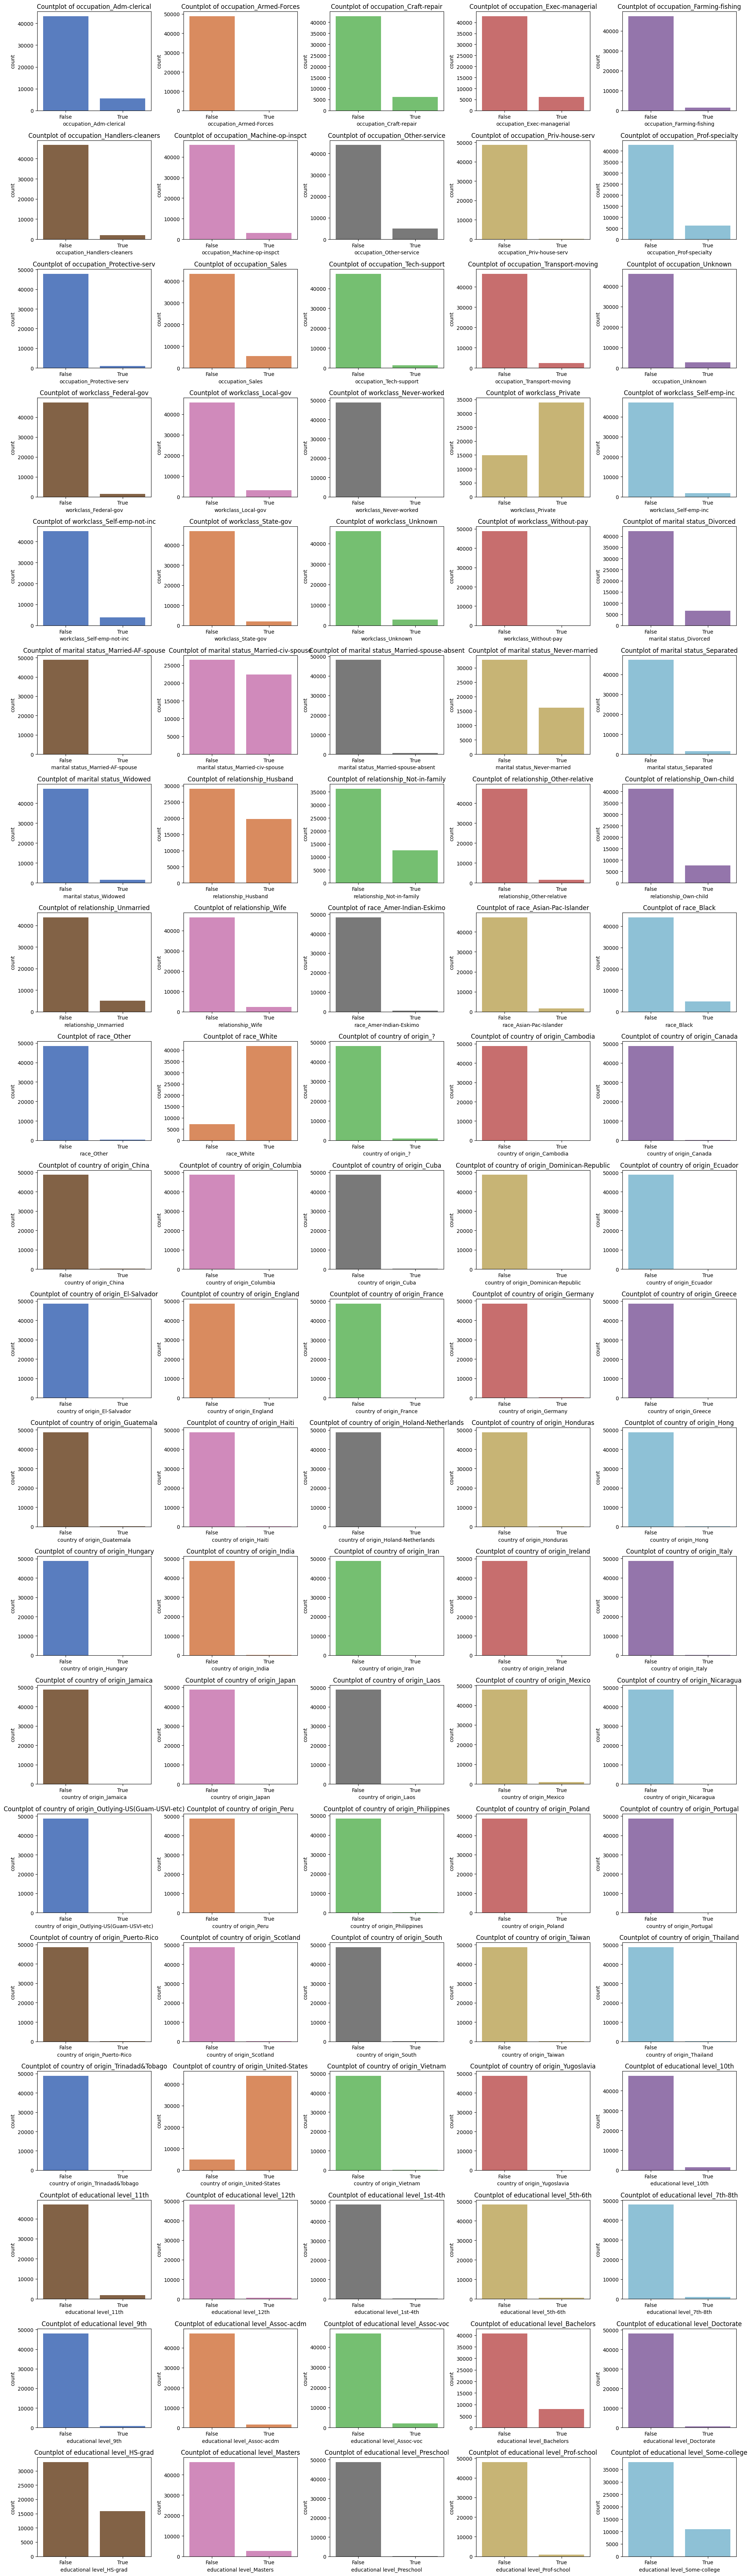

In [114]:
drop_cols = df.select_dtypes(include=np.number).columns
#drop_cols = drop_cols[drop_cols!='gender']
df_new = df.drop(drop_cols, axis=1)


num_cols = 5  # You can adjust the number of columns in the grid
num_rows = (len(df_new.columns) // num_cols + (len(df_new) % num_cols > 0))-1

# Create a grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 70))  # Square figsize

# Flatten the axes array to simplify indexing
axes = axes.flatten()

count=0
# Loop through each categorical column and create a subplot
for i, column in enumerate(df_new):
    # Calculate the current row and column in the grid
    row = i // num_cols
    col = i % num_cols

    # Create countplot on the current subplot
    sns.countplot(x=column, data=df_new, ax=axes[i], color=sns.color_palette()[count])
    
    # Set subplot title
    axes[i].set_title(f'Countplot of {column}')


    count=count+1
    if count==len(sns.color_palette()):
        count=0

for j in range(len(df_new), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

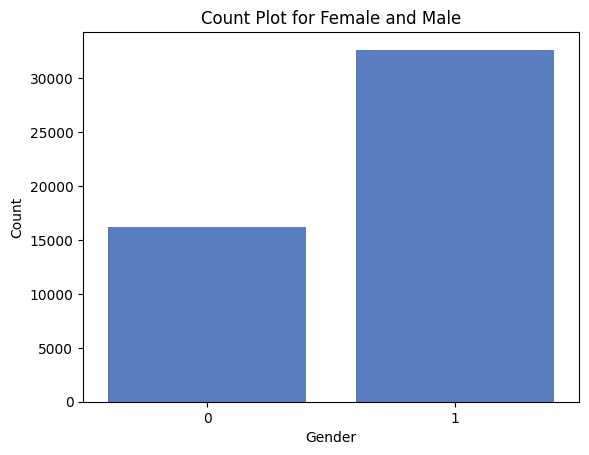

In [104]:

x=df['gender']
sns.countplot(x='gender', data=df, color=sns.color_palette()[count])
count=count+1

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count Plot for Female and Male')

# Show the plot
plt.show()

**NOTE**: In Gender, Male=1 and Female=0

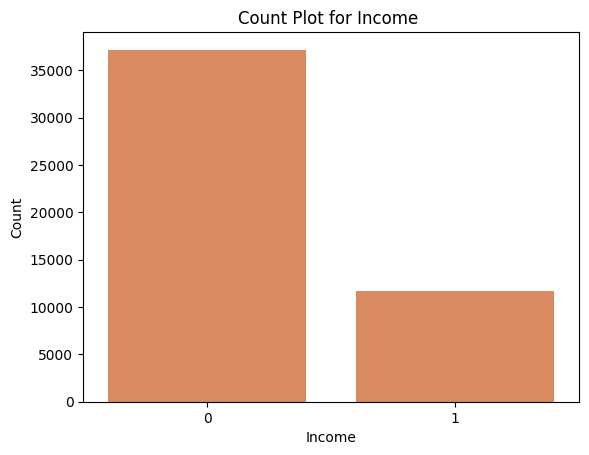

In [105]:
x=df['income']
sns.countplot(x='income', data=df,color=sns.color_palette()[count])

# Set plot labels and title
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Count Plot for Income ')

# Show the plot
plt.show()

**NOTE**: In Income, 0="<50k" and 1=">50k"

### Boxplot

In [76]:
drop_cols

Index(['age', 'years of studying', 'gender', 'capital_gain', 'capital_loss',
       'working hours per week', 'income'],
      dtype='object')

In [91]:
drop_cols = df.select_dtypes(include=np.number).columns
drop_cols = drop_cols[drop_cols!='gender']
drop_cols = drop_cols[drop_cols!='income']
drop_cols = drop_cols[drop_cols!='capital_gain']
drop_cols = drop_cols[drop_cols!='capital_loss']
num= drop_cols #droping income


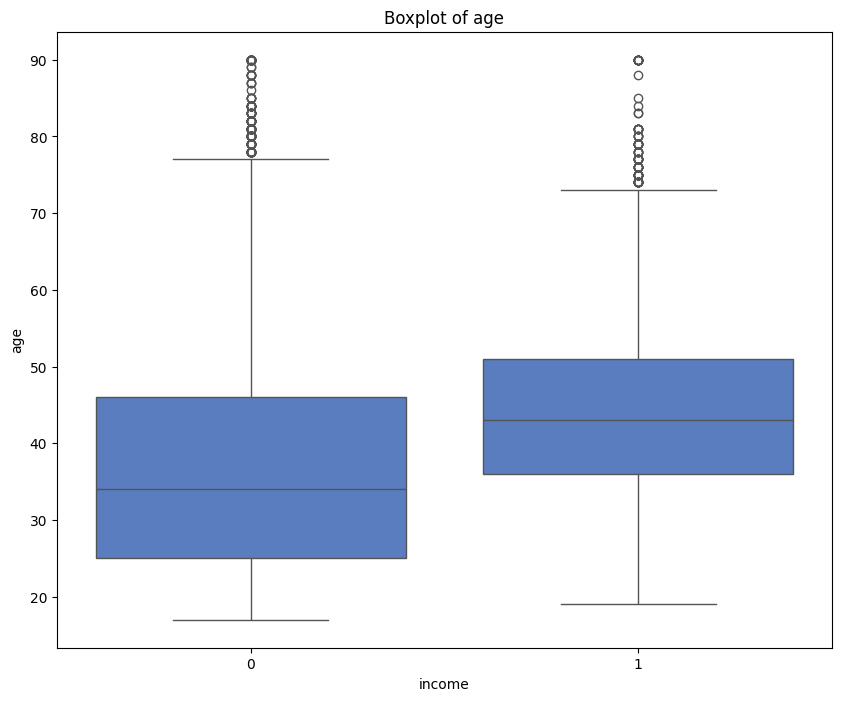

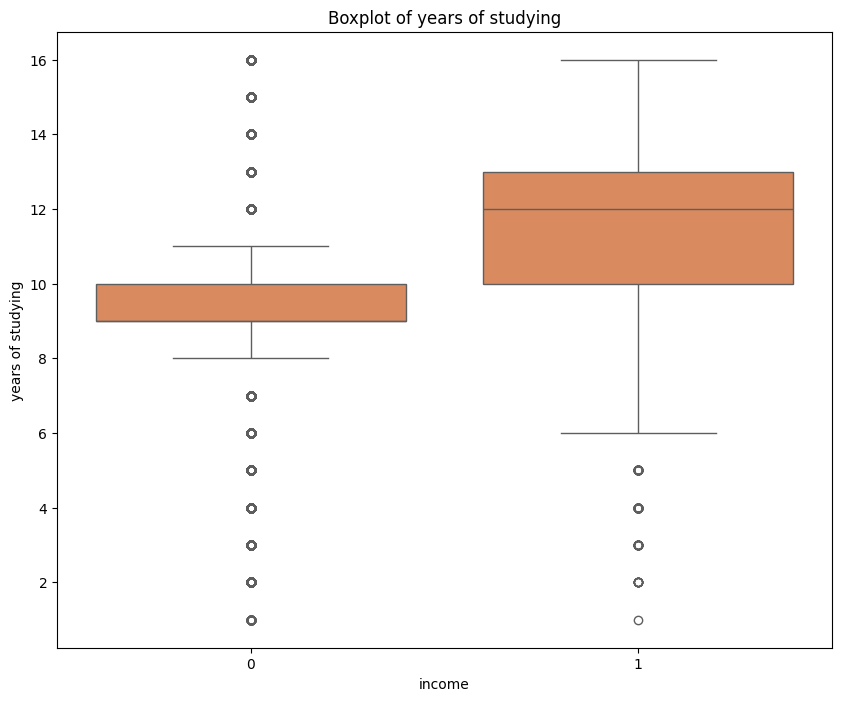

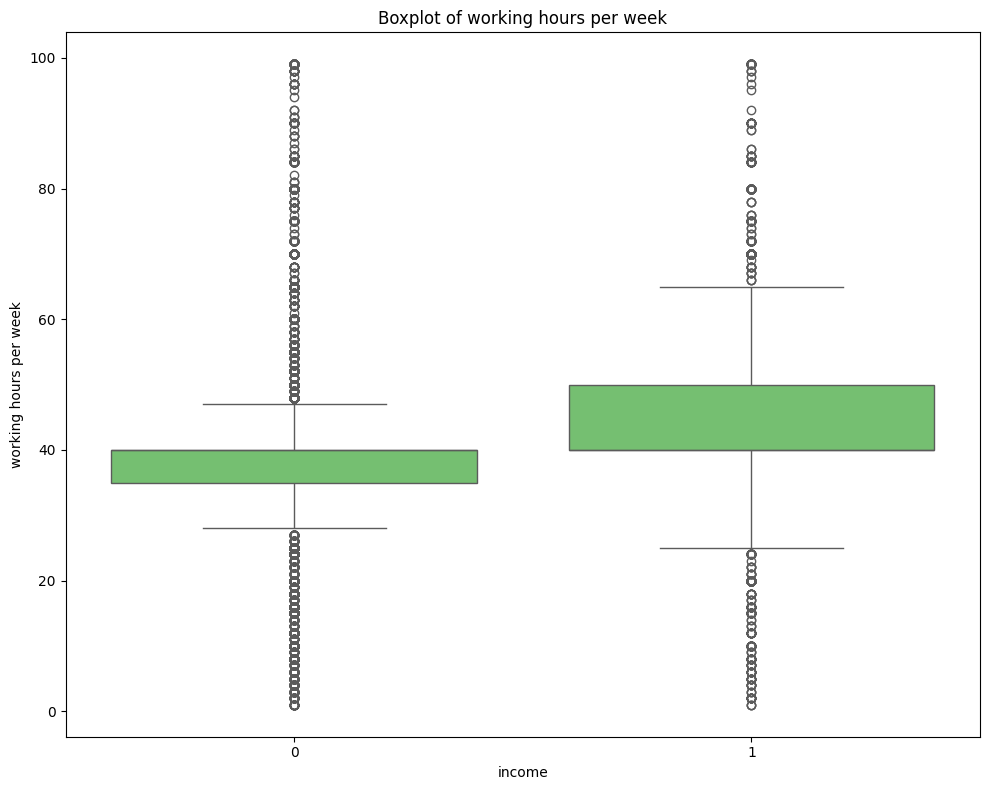

In [108]:
o=0


for i in num:
    plt.figure(figsize=(10,8))
    sns.boxplot(x='income', y=f'{i}', data=df, color=sns.color_palette()[o])
    plt.title(f'Boxplot of {i}')
    o+=1
    

plt.tight_layout()
plt.show()

### Histogram (target value)

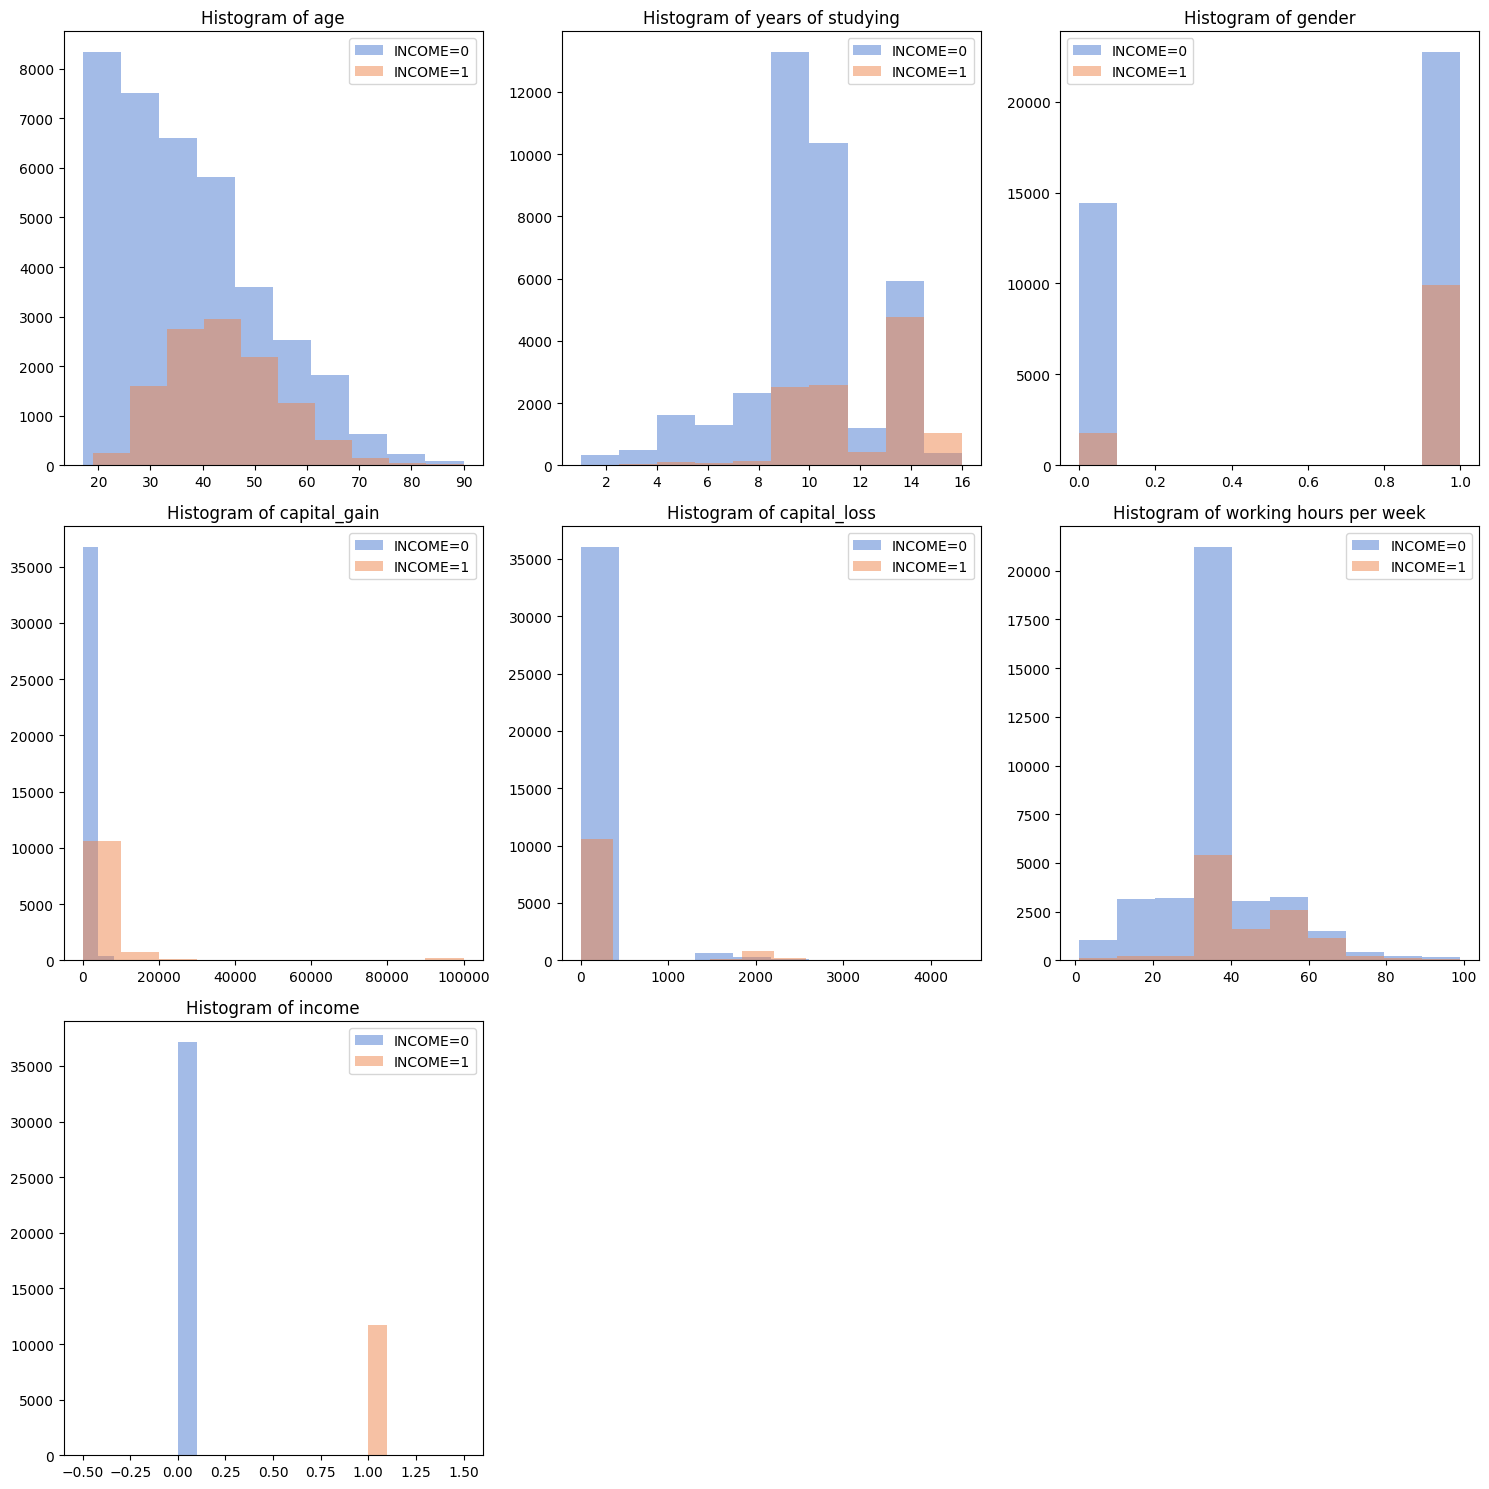

In [12]:
grouped = df.groupby('income')

#Get the list of numerical features
numerical_features = df[['age', 'years of studying', 'gender', 'capital_gain', 'capital_loss', 'working hours per week','income']].columns

#Calculate the number of rows and columns for the subplots
n = len(numerical_features)
ncols = 3 #Height -> y axis
nrows = n // ncols if n % ncols == 0 else n // ncols + 1 #X axis

#Create a new figure for the subplots
fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

#Flatten the axes array
axs = axs.flatten()

#Iterate over each numerical feature
for i, feature in enumerate(numerical_features):  # Iterate over each group and plot the histogram on the corresponding subplot

    # Add a title and a legend to each subplot
    axs[i].set_title(f'Histogram of {feature}')
    for name, group in grouped:
        axs[i].hist(group[feature], alpha=0.5, label=f'INCOME={name}')
    axs[i].legend()

#Remove extra subplots
for i in range(n, nrows*ncols):
        fig.delaxes(axs[i])

#Display the plot
plt.tight_layout()
plt.show()